In [6]:
# 1. Download Dataset
#Data Source: https://advnet.seas.upenn.edu/#:~:text=AdvNet%20is%20a%20dataset%20of,without%20any%20stickers%20on%20them
import gdown

url = f"https://drive.google.com/uc?id=13NdhIvPgzOQoRg9A-xUUXSsfxVwPrEUV"
output_path = "../content/LisaCnn.zip" #download location
gdown.download(url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=13NdhIvPgzOQoRg9A-xUUXSsfxVwPrEUV
From (redirected): https://drive.google.com/uc?id=13NdhIvPgzOQoRg9A-xUUXSsfxVwPrEUV&confirm=t&uuid=72a1277f-cbb8-47f6-962d-9dbcabdca20b
To: c:\Users\Amy\Documents\GitHub\adverserial-ml-security\content\LisaCnn.zip
100%|██████████| 6.47M/6.47M [00:00<00:00, 49.4MB/s]


'../content/LisaCnn.zip'

In [7]:
# 2. Extract the Downloaded Dataset"""

import zipfile
import os

#CHANGE THIS
#zip_path = "C:/Users/himsi/source/repos/PythonTester/LisaCnn.zip"  # Update with the correct path on your local machine
zip_path = "../content/LisaCnn.zip"
#CHANGE THIS
extract_dir = "../content/LisaCnn"  # Correct extraction directory for local machine

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction completed.")

Extraction completed.


In [8]:
# 3. Check Folder Structure

for root, dirs, files in os.walk(extract_dir):
    print(root, ":", len(files), "files")


../content/LisaCnn : 0 files
../content/LisaCnn\LisaCnn : 0 files
../content/LisaCnn\LisaCnn\Speed35Signs : 1 files
../content/LisaCnn\LisaCnn\Speed35Signs\Adv : 1006 files
../content/LisaCnn\LisaCnn\Speed35Signs\Clean : 815 files
../content/LisaCnn\LisaCnn\StopSigns : 0 files
../content/LisaCnn\LisaCnn\StopSigns\CleanStop : 902 files
../content/LisaCnn\LisaCnn\StopSigns\LisaAdvStop : 0 files
../content/LisaCnn\LisaCnn\StopSigns\LisaAdvStop\AdvStop : 964 files
../content/LisaCnn\LisaCnn\StopSigns\LisaAdvStop\__MACOSX : 1 files
../content/LisaCnn\LisaCnn\StopSigns\LisaAdvStop\__MACOSX\AdvStop : 964 files
../content/LisaCnn\LisaCnn\YieldSigns : 1 files
../content/LisaCnn\LisaCnn\YieldSigns\AdvYield : 1018 files
../content/LisaCnn\LisaCnn\YieldSigns\CleanYield : 928 files


In [ ]:
# 4. Organize the Dataset"""

import shutil

# Paths
original_root = "../content/LisaCnn/LisaCnn"
clean_root = "../content/LisaCnn_Clean"
adv_root = "../content/LisaCnn_Adv"  # New folder for adversarial images

# Categories and their corresponding "clean" and "adversarial" folders
categories = {
    "Speed35Signs": ("Speed35Signs/Clean", "Speed35Signs/Adv"),
    "StopSigns": ("StopSigns/CleanStop", "StopSigns/LisaAdvStop/AdvStop"),
    "YieldSigns": ("YieldSigns/CleanYield", "YieldSigns/AdvYield")
}

# Create dataset structures
os.makedirs(clean_root, exist_ok=True)
os.makedirs(adv_root, exist_ok=True)

for category, (clean_folder, adv_folder) in categories.items():
    clean_source = os.path.join(original_root, clean_folder)
    adv_source = os.path.join(original_root, adv_folder)

    clean_target = os.path.join(clean_root, category)
    adv_target = os.path.join(adv_root, category)

    os.makedirs(clean_target, exist_ok=True)
    os.makedirs(adv_target, exist_ok=True)

    # Copy clean images
    for file in os.listdir(clean_source):
        file_path = os.path.join(clean_source, file)
        if os.path.isfile(file_path):
            shutil.copy(file_path, os.path.join(clean_target, file))

    # Copy adversarial images
    for file in os.listdir(adv_source):
        file_path = os.path.join(adv_source, file)
        if os.path.isfile(file_path):
            shutil.copy(file_path, os.path.join(adv_target, file))

print("Clean and adversarial datasets structured successfully.")

Clean and adversarial datasets structured successfully.


Could not open LisaCnn/LisaCnn\StopSigns/CleanStop\.DS_Store: cannot identify image file 'LisaCnn/LisaCnn\\StopSigns/CleanStop\\.DS_Store'
          Category  Width  Height Mode
0     Speed35Signs     32      32  RGB
1     Speed35Signs     32      32  RGB
2     Speed35Signs     32      32  RGB
3     Speed35Signs     32      32  RGB
4     Speed35Signs     32      32  RGB
...            ...    ...     ...  ...
2639    YieldSigns     32      32  RGB
2640    YieldSigns     32      32  RGB
2641    YieldSigns     32      32  RGB
2642    YieldSigns     32      32  RGB
2643    YieldSigns     32      32  RGB

[2644 rows x 4 columns]


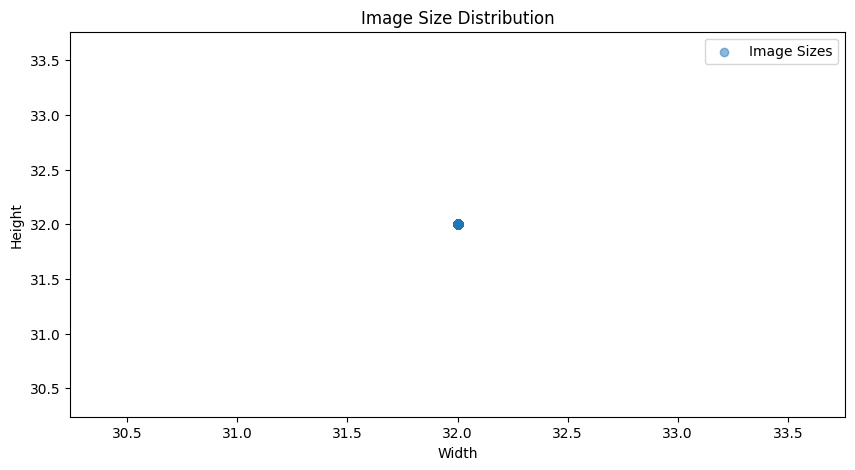

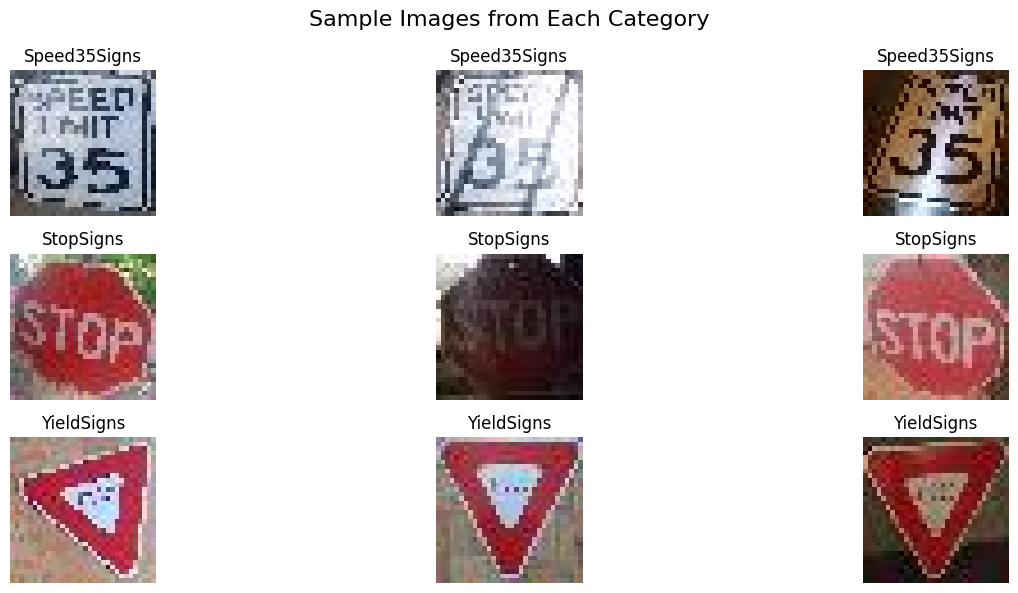

In [ ]:
# 5. Analyze Image Sizes and Color Channels"""

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define dataset path
dataset_root = "../content/LisaCnn/LisaCnn"

# Clean image directories
clean_folders = {
    "Speed35Signs": "Speed35Signs/Clean",
    "StopSigns": "StopSigns/CleanStop",
    "YieldSigns": "YieldSigns/CleanYield"
}

# Store statistics
image_stats = []

# Analyze each category
for category, folder in clean_folders.items():
    folder_path = os.path.join(dataset_root, folder)
    if os.path.exists(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            try:
                with Image.open(image_path) as img:
                    width, height = img.size
                    mode = img.mode  # 'RGB', 'L' (grayscale), etc.
                    image_stats.append((category, width, height, mode))
            except Exception as e:
                print(f"Could not open {image_path}: {e}")

# Convert to DataFrame
df_stats = pd.DataFrame(image_stats, columns=["Category", "Width", "Height", "Mode"])
print(df_stats)

# Plot Image Size Distributions
plt.figure(figsize=(10, 5))

# Plot width vs. height
plt.scatter(df_stats["Width"], df_stats["Height"], alpha=0.5, label="Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.legend()
plt.show()

import random

# Number of images per category to display
num_show = 3

# Plot some sample images
plt.figure(figsize=(15, 6))

for i, (category, folder) in enumerate(clean_folders.items()):
    folder_path = os.path.join(dataset_root, folder)
    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)
        random.shuffle(image_files)
        for j in range(num_show):
            img_path = os.path.join(folder_path, image_files[j])
            try:
                img = Image.open(img_path)
                plt.subplot(len(clean_folders), num_show, i * num_show + j + 1)
                plt.imshow(img)
                plt.title(f"{category}")
                plt.axis('off')
            except Exception as e:
                print(f"Could not open {img_path}: {e}")

plt.suptitle("Sample Images from Each Category", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# 6. Load Dataset Using PyTorch's ImageFolder"""


import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformation: only ToTensor (no normalization)
transform = transforms.ToTensor()

# Load dataset using ImageFolder with simple transform
dataset = datasets.ImageFolder(root=clean_root, transform=transform)

# Split dataset into train (80%) and validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print("Dataloaders ready (no normalization).")

Dataloaders ready (no normalization).


In [7]:
# 7. Import Dependencies"""

import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [8]:
# 8. Define & Modify ResNet-18"""

class CustomResNet(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomResNet, self).__init__()
        self.model = models.resnet18(weights=None)  # Load ResNet-18 without pretrained weights

        # Modify first layer to accept 32x32 images (instead of 224x224)
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

        # Remove max pooling (since 32x32 is small)
        self.model.maxpool = nn.Identity()

        # Modify the final fully connected layer for 3 classes
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Instantiate model
model = CustomResNet(num_classes=3).to(device)
print("ResNet-18 model ready.")

ResNet-18 model ready.


In [9]:
# 9. Define Loss & Optimizer"""

criterion = nn.CrossEntropyLoss()  # Multi-class classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Adam optimizer with weight decay

In [10]:
# 10. Train the Model"""

num_epochs = 5  # Number of training epochs

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

print("Training complete.")

Epoch 1/5, Loss: 0.2538, Train Acc: 90.64%
Epoch 2/5, Loss: 0.0593, Train Acc: 98.11%
Epoch 3/5, Loss: 0.0308, Train Acc: 98.87%
Epoch 4/5, Loss: 0.0312, Train Acc: 98.77%
Epoch 5/5, Loss: 0.0317, Train Acc: 99.29%
Training complete.


In [11]:
#11. Evaluate the Model"""

model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_acc = 100 * correct / total
print(f"Validation Accuracy: {val_acc:.2f}%")

Validation Accuracy: 99.05%


In [12]:
# 12. Save the Model"""

torch.save(model.state_dict(), "resnet18_traffic_signs.pth")
print("Model saved.")

Model saved.


In [13]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define the FGSM attack function (Fast Gradient Sign Method)
def fgsm_attack(model, image, label, epsilon):
    model.eval()  # Ensure model is in train mode for gradients during attack #changes to eval mode 
    image = image.clone().detach().requires_grad_(True)  # Ensure image retains gradients
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()  # Zero out the gradients before the backward pass
    loss.backward()

    data_grad = image.grad.data
    adv_image = image + epsilon * data_grad.sign()
    adv_image = torch.clamp(adv_image, 0, 1)  # Clamp to [0, 1]
    return adv_image.detach()

# PGD Attack Function (Projected Gradient Descent)
def pgd_attack(model, image, label, epsilon, alpha, iterations):
    model.eval()  # Ensure model is in train mode for gradients during attack #changes to eval mode 
    
    image_adv = image.clone().detach().requires_grad_(True)  # Ensure image requires gradients
    original_image = image.clone().detach()

    for _ in range(iterations):
        output = model(image_adv)  # Forward pass
        loss = F.cross_entropy(output, label)  # Compute loss
        model.zero_grad()  # Zero out the gradients before the backward pass
        loss.backward()  # Compute gradients for backpropagation

        if image_adv.grad is None:
            break

        # Gradient update
        with torch.no_grad():
            image_adv = image_adv + alpha * image_adv.grad.sign()
            image_adv = torch.min(torch.max(image_adv, original_image - epsilon), original_image + epsilon)
            image_adv = torch.clamp(image_adv, 0, 1)  # Ensure image is within valid pixel range

    return image_adv.detach()

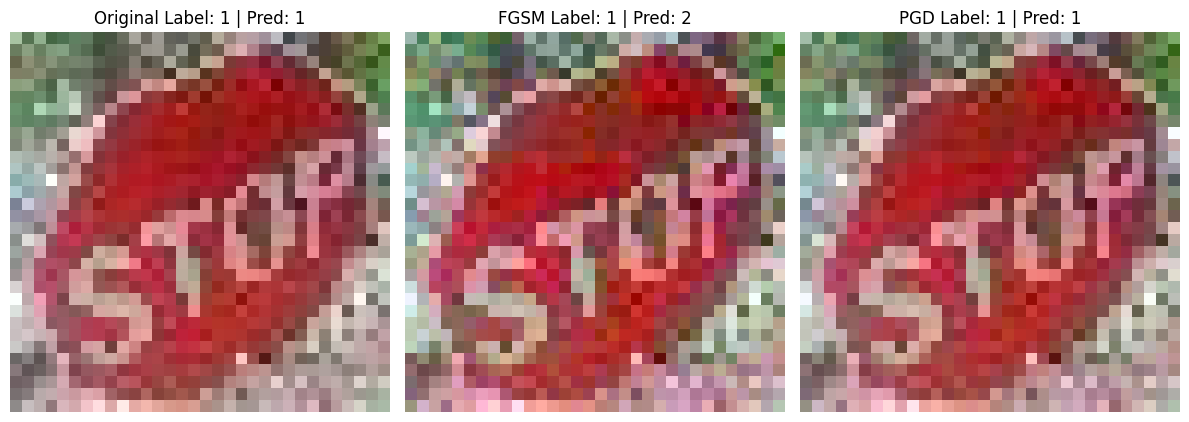

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04705883..0.04705885].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.023529414..0.02352944].


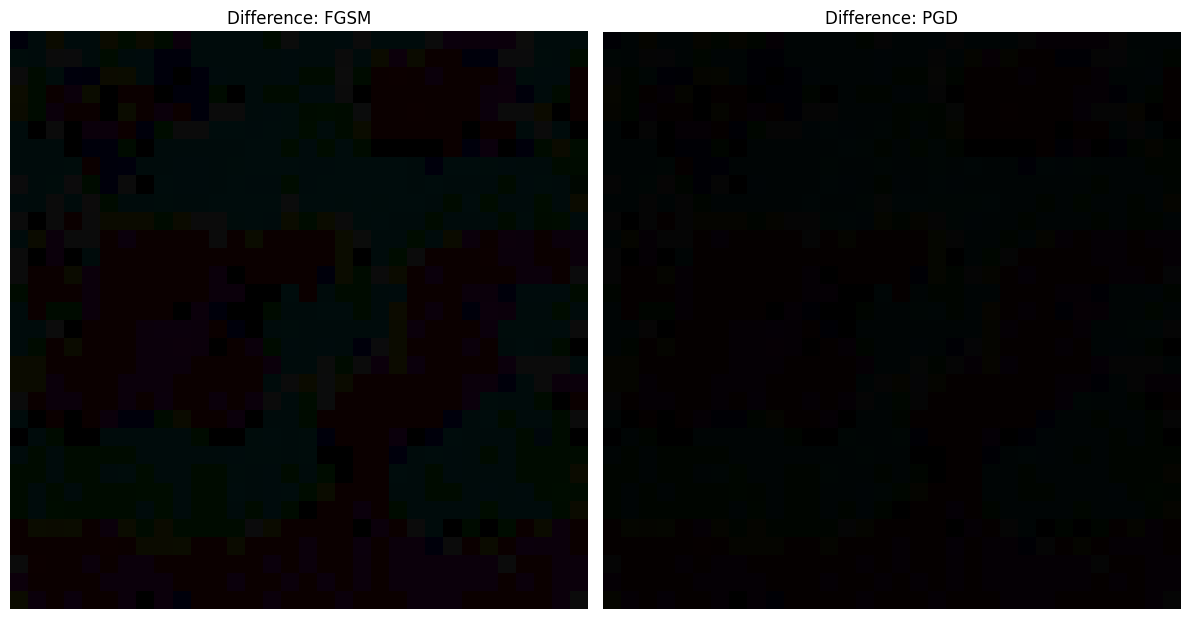

In [63]:
# PGD Attack Parameters
epsilon = 12 / 255  # Increased perturbation magnitude
alpha = 6 / 255     # Increased step size for PGD attack
iterations = 50    # Number of iterations for PGD attack

# Example: Get one image and label from your validation set
images, labels = next(iter(val_loader))
image = images[1].unsqueeze(0).clone().detach().to(device)
label = labels[1].unsqueeze(0).clone().detach().to(device)

# Compute FGSM adversarial images
adv_image_fgsm = fgsm_attack(model, image, label, epsilon)  # Ensure FGSM is computed here

# Compute PGD adversarial images
adv_image_pgd = pgd_attack(model, image, label, epsilon, alpha, iterations)  # PGD computation

# Get predictions for original image, FGSM, and PGD adversarial image
model.eval()  # Set model to evaluation mode for inference
with torch.no_grad():
    pred_clean = model(image).argmax(dim=1).item()
    pred_fgsm = model(adv_image_fgsm).argmax(dim=1).item()  # Use adv_image_fgsm
    pred_pgd = model(adv_image_pgd).argmax(dim=1).item()  # Use adv_image_pgd

# Visualize the original, FGSM, and PGD adversarial images
image_vis = image.squeeze().detach().cpu()
adv_vis_fgsm = adv_image_fgsm.squeeze().detach().cpu()
adv_vis_pgd = adv_image_pgd.squeeze().detach().cpu()

plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_vis.permute(1, 2, 0).numpy())
plt.title(f"Original Label: {label.item()} | Pred: {pred_clean}")
plt.axis('off')

# FGSM Adversarial Image
plt.subplot(1, 3, 2)
plt.imshow(adv_vis_fgsm.permute(1, 2, 0).numpy())
plt.title(f"FGSM Label: {label.item()} | Pred: {pred_fgsm}")
plt.axis('off')

# PGD Adversarial Image
plt.subplot(1, 3, 3)
plt.imshow(adv_vis_pgd.permute(1, 2, 0).numpy())
plt.title(f"PGD Label: {label.item()} | Pred: {pred_pgd}")
plt.axis('off')

plt.tight_layout()
plt.show()

# Visualize the difference between original and adversarial images
diff_fgsm = (adv_image_fgsm - image).squeeze().detach().cpu()
diff_pgd = (adv_image_pgd - image).squeeze().detach().cpu()

# Plot the differences
plt.figure(figsize=(12, 8))

# Difference between Original and FGSM
plt.subplot(1, 2, 1)
plt.imshow(diff_fgsm.permute(1, 2, 0).numpy())
plt.title("Difference: FGSM")
plt.axis('off')

# Difference between Original and PGD
plt.subplot(1, 2, 2)
plt.imshow(diff_pgd.permute(1, 2, 0).numpy())
plt.title("Difference: PGD")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def bit_depth_reduction(img, bits=3):
  levels = 2 ** bits
  return torch.round(img * (levels - 1)) / (levels - 1)

def binary_filter(img, threshold=0.5):
  return torch.relu(torch.sign(img - threshold))

correct_clean, correct_fgsm, correct_pgd, correct_bit_fgsm, correct_binfilter_fgsm, correct_bit_pgd, correct_binfilter_pgd, total = 0, 0, 0, 0, 0, 0, 0, 0

thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
bit_levels = [1, 2, 3, 4, 5, 6, 7]

binary_results_fgsm = {t: 0 for t in thresholds}
bit_results_fgsm = {b: 0 for b in bit_levels}

binary_results_pgd = {t: 0 for t in thresholds}
bit_results_pgd = {b: 0 for b in bit_levels}

# Iterate over the validation set
for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)

    # Clean prediction
    with torch.no_grad():
        outputs_clean = model(images)
        _, preds_clean = torch.max(outputs_clean, 1)

    # Generate FGSM and PGD adversarial examples
    adv_images_fgsm = fgsm_attack(model, images, labels, epsilon)
    adv_images_pgd = pgd_attack(model, images, labels, epsilon, alpha, iterations)

    # FGSM prediction
    with torch.no_grad():
        outputs_fgsm = model(adv_images_fgsm)
        _, preds_fgsm = torch.max(outputs_fgsm, 1)

    # PGD prediction
    with torch.no_grad():
        outputs_pgd = model(adv_images_pgd)
        _, preds_pgd = torch.max(outputs_pgd, 1)

    # FGSM + Bit-depth reduction
    for b in bit_levels:
      reduced_fgsm_adv_images = bit_depth_reduction(adv_images_fgsm, b)

      with torch.no_grad():
          outputs_bit = model(reduced_fgsm_adv_images)
          _, preds_bit = torch.max(outputs_bit, 1)
          bit_results_fgsm[b] += (preds_bit == labels).sum().item()

    # FGSM + Binary Filter
    for t in thresholds:
      filtered_fgsm_adv_images = binary_filter(adv_images_fgsm, t)

      with torch.no_grad():
          outputs_binfilter = model(filtered_fgsm_adv_images)
          _, preds_binfilter = torch.max(outputs_binfilter, 1)
          binary_results_fgsm[t] += (preds_binfilter == labels).sum().item()

    # PGD + Bit-depth reduction
    for b in bit_levels:
      reduced_pgd_adv_images = bit_depth_reduction(adv_images_pgd, b)

      with torch.no_grad():
          outputs_bit = model(reduced_pgd_adv_images)
          _, preds_bit = torch.max(outputs_bit, 1)
          bit_results_pgd[b] += (preds_bit == labels).sum().item()

    # PGD + Binary Filter
    for t in thresholds:
      filtered_pgd_adv_images = binary_filter(adv_images_pgd, t)

      with torch.no_grad():
          outputs_binfilter = model(filtered_pgd_adv_images)
          _, preds_binfilter = torch.max(outputs_binfilter, 1)
          binary_results_pgd[t] += (preds_binfilter == labels).sum().item()

    # Count accuracy
    correct_clean += (preds_clean == labels).sum().item()
    correct_fgsm += (preds_fgsm == labels).sum().item()
    correct_pgd += (preds_pgd == labels).sum().item()
    total += labels.size(0)


# Final accuracy printout
val_acc_clean = 100 * correct_clean / total
val_acc_fgsm = 100 * correct_fgsm / total
val_acc_pgd = 100 * correct_pgd / total

print(f"✅ Clean Accuracy on full val set: {val_acc_clean:.2f}%")
print(f"⚠️  FGSM Accuracy on full val set : {val_acc_fgsm:.2f}%")

for b in bit_levels:
  bit_fgsm_acc = 100 * bit_results_fgsm[b] / total
  print(f"FGSM + Bit-Depth Reduction (bits={b}) : {bit_fgsm_acc:.2f}%")

for t in thresholds:
  binary_fgsm_acc = 100 * binary_results_fgsm[t] / total
  print(f"FGSM + Binary Filter (threshold={t}) : {binary_fgsm_acc:.2f}%")

print(f"🔨  PGD Accuracy on full val set  : {val_acc_pgd:.2f}%")

for b in bit_levels:
  bit_pgd_acc = 100 * bit_results_pgd[b] / total
  print(f"PGD + Bit-Depth Reduction (bits={b}) : {bit_pgd_acc:.2f}%")

for t in thresholds:
  binary_pgd_acc = 100 * binary_results_pgd[t] / total
  print(f"PGD + Binary Filter (threshold={t}) : {binary_pgd_acc:.2f}%")


✅ Clean Accuracy on full val set: 99.05%
⚠️  FGSM Accuracy on full val set : 37.81%
FGSM + Bit-Depth Reduction (bits=1) : 63.33%
FGSM + Bit-Depth Reduction (bits=2) : 40.08%
FGSM + Bit-Depth Reduction (bits=3) : 37.81%
FGSM + Bit-Depth Reduction (bits=4) : 37.81%
FGSM + Bit-Depth Reduction (bits=5) : 38.00%
FGSM + Bit-Depth Reduction (bits=6) : 37.62%
FGSM + Bit-Depth Reduction (bits=7) : 37.81%
FGSM + Binary Filter (threshold=0.2) : 53.31%
FGSM + Binary Filter (threshold=0.3) : 71.46%
FGSM + Binary Filter (threshold=0.4) : 71.27%
FGSM + Binary Filter (threshold=0.5) : 63.33%
FGSM + Binary Filter (threshold=0.6) : 51.98%
FGSM + Binary Filter (threshold=0.7) : 41.40%
🔨  PGD Accuracy on full val set  : 73.35%
PGD + Bit-Depth Reduction (bits=1) : 70.51%
PGD + Bit-Depth Reduction (bits=2) : 71.83%
PGD + Bit-Depth Reduction (bits=3) : 72.21%
PGD + Bit-Depth Reduction (bits=4) : 73.91%
PGD + Bit-Depth Reduction (bits=5) : 73.53%
PGD + Bit-Depth Reduction (bits=6) : 73.35%
PGD + Bit-Depth Red

In [71]:
import matplotlib.pyplot as plt

def show_defence_example(original, fgsm, pgd, bit_reduced_list_fgsm, binary_filtered_list_fgsm, bit_reduced_list_pgd, binary_filtered_list_pgd, bit_levels, thresholds, index=0):
    total_cols = 1 + len(bit_levels) + len(thresholds)
    plt.figure(figsize=(3 * total_cols, 9)) 

    # Row 1: Original
    plt.subplot(3, total_cols, total_cols // 2 + 1)
    plt.imshow(original[index].permute(1, 2, 0).cpu().numpy())
    plt.title("Original")
    plt.axis("off")

    # Row 2: FGSM + Bit + Threshold 
    plt.subplot(3, total_cols, total_cols + 1)
    plt.imshow(fgsm[index].permute(1, 2, 0).cpu().numpy())
    plt.title("FGSM Adv")
    plt.axis("off")

    for i, img in enumerate(bit_reduced_list_fgsm):
        plt.subplot(3, total_cols, total_cols + 2 + i)
        plt.imshow(img[index].permute(1, 2, 0).cpu().numpy())
        plt.title(f"FGSM Bit {bit_levels[i]}")
        plt.axis("off")

    for i, img in enumerate(binary_filtered_list_fgsm):
        plt.subplot(3, total_cols, total_cols + 2 + len(bit_levels) + i)
        plt.imshow(img[index].permute(1, 2, 0).cpu().numpy())
        plt.title(f"FGSM Thresh {thresholds[i]}")
        plt.axis("off")

    # Row 3: PGD + Bit + Threshold 
    plt.subplot(3, total_cols, 2 * total_cols + 1)
    plt.imshow(pgd[index].permute(1, 2, 0).cpu().numpy())
    plt.title("PGD Adv")
    plt.axis("off")

    for i, img in enumerate(bit_reduced_list_pgd):
        plt.subplot(3, total_cols, 2 * total_cols + 2 + i)
        plt.imshow(img[index].permute(1, 2, 0).cpu().numpy())
        plt.title(f"PGD Bit {bit_levels[i]}")
        plt.axis("off")

    for i, img in enumerate(binary_filtered_list_pgd):
        plt.subplot(3, total_cols, 2 * total_cols + 2 + len(bit_levels) + i)
        plt.imshow(img[index].permute(1, 2, 0).cpu().numpy())
        plt.title(f"PGD Thresh {thresholds[i]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


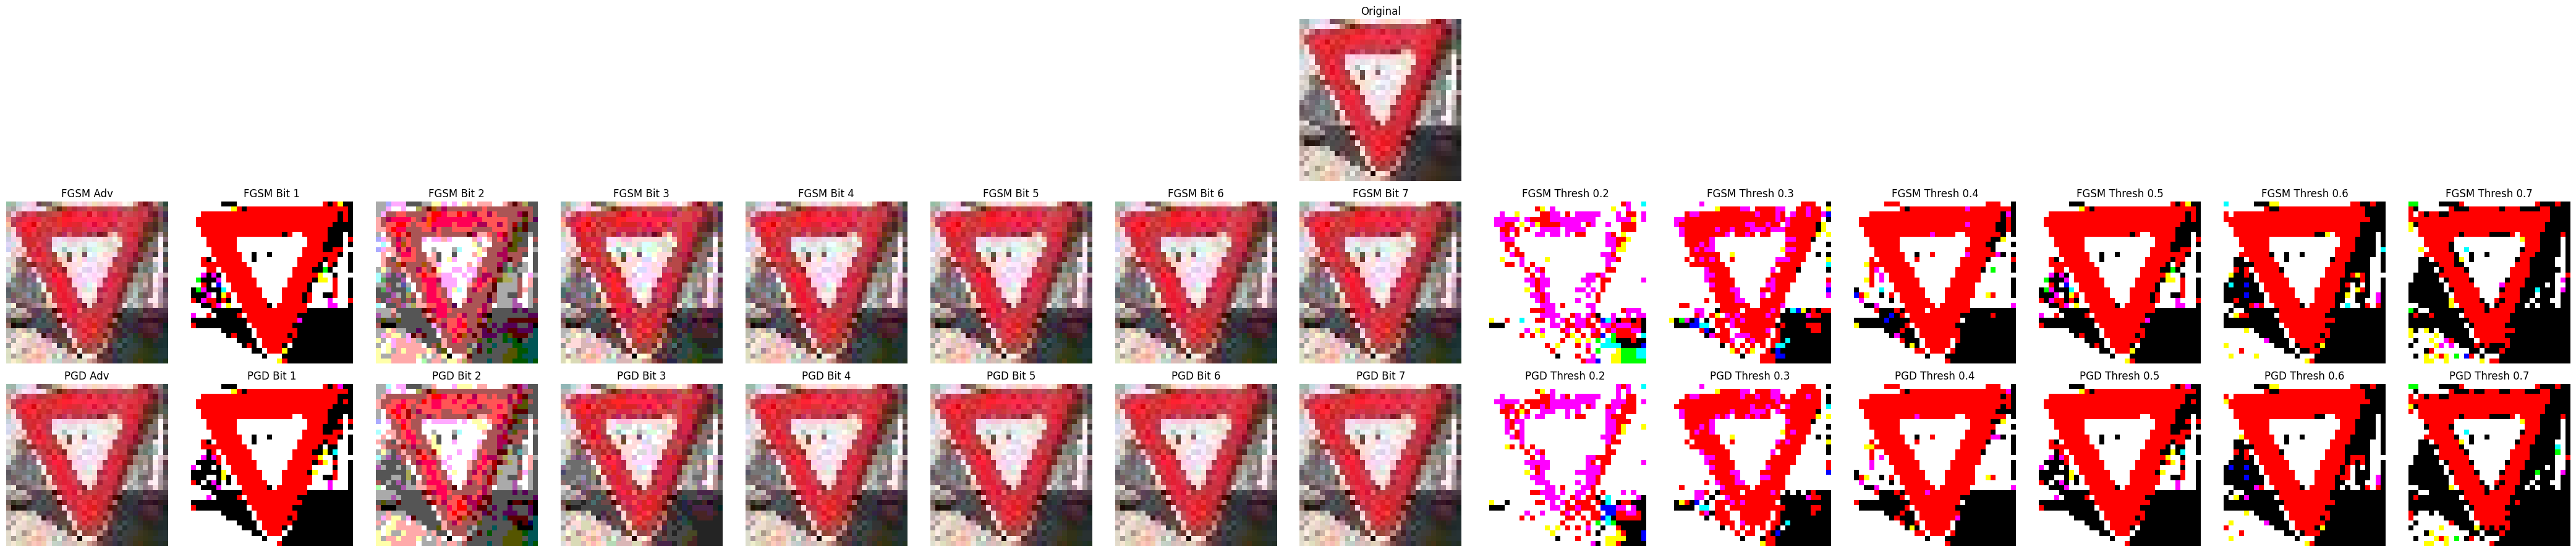

In [72]:
bit_reduced_images_fgsm = [bit_depth_reduction(adv_images_fgsm, b) for b in bit_levels]
binary_filtered_images_fgsm = [binary_filter(adv_images_fgsm, t) for t in thresholds]

bit_reduced_images_pgd = [bit_depth_reduction(adv_images_pgd, b) for b in bit_levels]
binary_filtered_images_pgd = [binary_filter(adv_images_pgd, t) for t in thresholds]

show_defence_example(images, adv_images_fgsm, adv_images_pgd, bit_reduced_images_fgsm, binary_filtered_images_fgsm, bit_reduced_images_pgd, binary_filtered_images_pgd, bit_levels, thresholds)